In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from mplsoccer import Pitch, Sbopen
from os import environ

In [35]:
parser = Sbopen()
competitions = parser.competition()
competitions[competitions.competition_name == 'FIFA World Cup']

matches = parser.match(competition_id=43, season_id=106)
match_id = 3869220

df, _, _, _ = parser.event(match_id)

In [36]:
def generatePlayerPassMapsGrid(team_name):
    # filtering to passes by team_name players
    team_passes = (df.type_name == 'Pass') & (df.team_name == team_name) & (df.sub_type_name != "Throw-in")
    # selecting only relevant columsn for the pass map
    team_passes = df.loc[team_passes, ['x', 'y', 'end_x', 'end_y', 'player_name','outcome_name']]
    #get the list of all players who made a pass
    names = team_passes['player_name'].unique()
    #draw 4x4 pitches
    pitch = Pitch(line_color='white',pitch_color='#02540b',pad_top=20)
    fig, axs = pitch.grid(ncols = 4, nrows = 4, grid_height=0.85, title_height=0.06, axis=False,endnote_height=0.04, title_space=0.04, endnote_space=0.01)
    plt.figure(figsize=(14,10))
    #for each player
    for name, ax in zip(names, axs['pitch'].flat[:len(names)]):
        #take only passes by this player
        player_df = team_passes.loc[team_passes["player_name"] == name]
        #put player name over the plot
        ax.text(60, -10, name.split()[0]+":"+str(len(player_df))+" passes",ha='center', va='center', fontsize=14)
        # plotting arrows one by one, red or green based on if its incomplete or not
        for i in player_df.index:
            x=player_df['x'][i]
            y = player_df['y'][i]
            dx = player_df['end_x'][i] - player_df['x'][i]
            dy = player_df['end_y'][i] - player_df['y'][i]
            if df['outcome_name'][i] != 'Incomplete':
                ax.arrow(x,y,dx,dy,color='#0dff00',length_includes_head=True,head_width=1,head_length=0.8)
                pitch.scatter(player_df['x'][i],player_df['y'][i],color='#0dff00',ax=ax)
            else:
                ax.arrow(x,y,dx,dy,color='red',length_includes_head=True,head_width=1,head_length=0.8)
                pitch.scatter(player_df['x'][i],player_df['y'][i],color='red',ax=ax)


    #We have more than enough pitches - remove them
    for ax in axs['pitch'][-1, 25 - len(names):]:
        ax.remove(ax)

    #Another way to set title using mplsoccer
    axs['title'].text(0.5, 0.5, team_name+" pass maps", ha='center', va='center', fontsize=20)

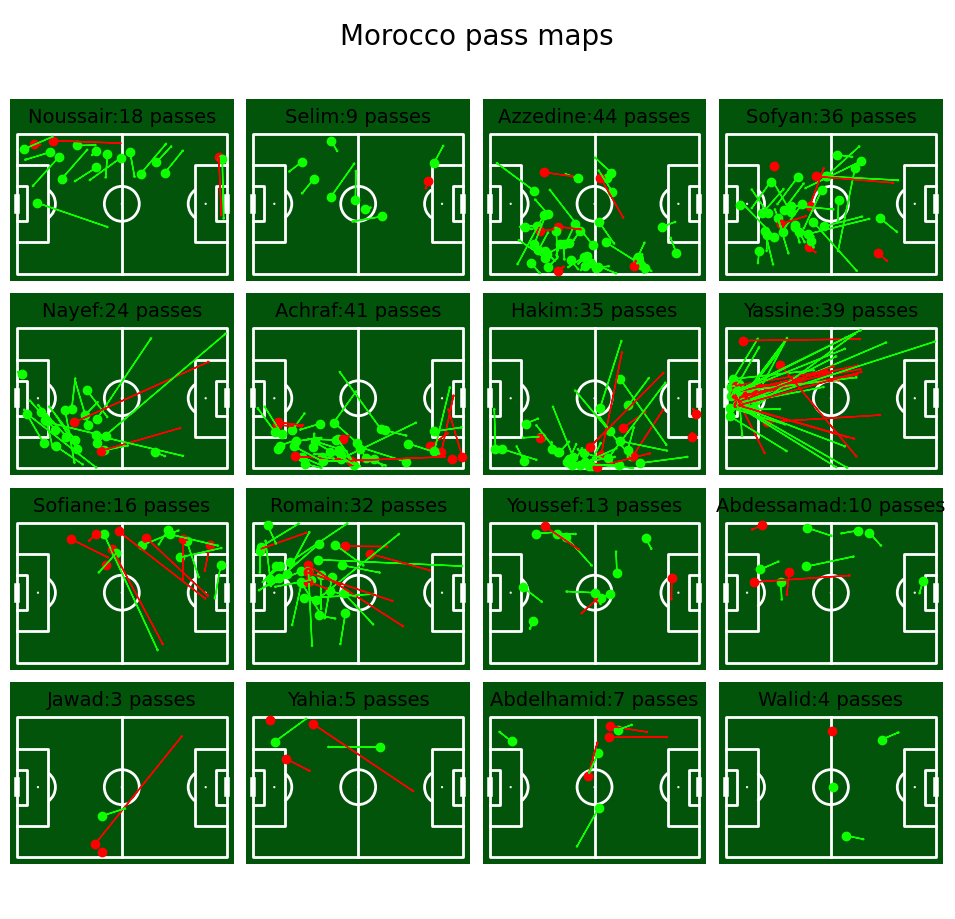

<Figure size 1400x1000 with 0 Axes>

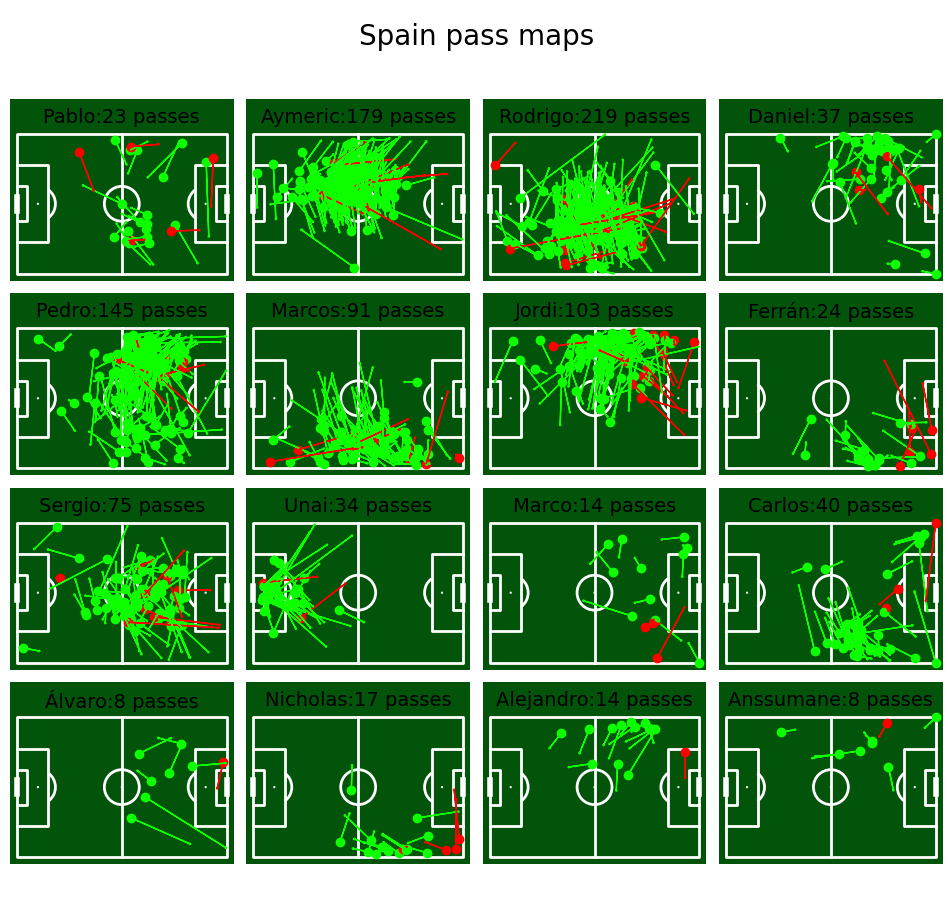

<Figure size 1400x1000 with 0 Axes>

In [37]:
generatePlayerPassMapsGrid('Morocco')
generatePlayerPassMapsGrid('Spain')